## Set up data
#### Same steps as highlighted in Data Preprocessing section, except I resize the images to 64x64 to speed up model training, while hoping to get same or better results.

Found 1962 files belonging to 2 classes.


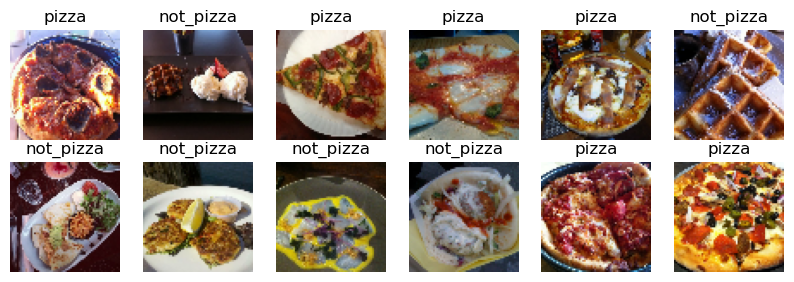

In [1]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# From the data directory, import the images with binary numeric labels, convert to RGB, and crop images to standard size
data = tf.keras.utils.image_dataset_from_directory(
    "../pizza_not_pizza",
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    image_size=(64, 64),
    crop_to_aspect_ratio=True)

plt.figure(figsize=(10, 10))
class_names = data.class_names
for images, labels in data.take(1):
    for i in range(12):
        ax = plt.subplot(6, 6, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(np.array(labels[i])[0])])
        plt.axis("off")

# From the documents, we can implement a standardization layer in the model such that we don't have to pre-process beforehand
normalization_layer = layers.Rescaling(1./63)

# Implement an 80/20 train/test split
train_data, test_data = tf.keras.utils.split_dataset(data, left_size = 0.8, shuffle = True, seed = 21)

# Tune the datasets for performance optimization per the documentation
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size = AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size = AUTOTUNE)

## Build, train, and evaluate model
#### Reasoning: I tried to limit overfitting by simplifying the model. This shows up with a lower number of layers (5) as well as a lower number of nodes (32) in the relu layer preceding the sigmoid layer. Also, the smaller convolution area (2x2) and larger MaxPooling area (8x8) both simplify the model, speeding up the training process. Despite the fast training (about 10-12 seconds), this simplified model manages to attain a slightly better test accuracy (about 82%) compared to the previous models.

In [2]:
# Build and train model
model = tf.keras.Sequential([
    normalization_layer,
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPooling2D((8, 8)),
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

trainHistory = model.fit(train_data, epochs = 10)

# Evaluate model
trainMetrics = model.evaluate(train_data, verbose = 0)
testMetrics = model.evaluate(test_data, verbose = 0)
print("Training data performance:\nLoss: %.2f\nAccuracy: %.2f\n" % (trainMetrics[0], trainMetrics[1]))
print("Testing data performance:\nLoss: %.2f\nAccuracy: %.2f" % (testMetrics[0], testMetrics[1]))

Epoch 1/10
50/50 [==============================] - 2s 17ms/step - loss: 0.6572 - accuracy: 0.6089
Epoch 2/10
50/50 [==============================] - 1s 16ms/step - loss: 0.5803 - accuracy: 0.6911
Epoch 3/10
50/50 [==============================] - 1s 16ms/step - loss: 0.5233 - accuracy: 0.7268
Epoch 4/10
50/50 [==============================] - 1s 16ms/step - loss: 0.4776 - accuracy: 0.7701
Epoch 5/10
50/50 [==============================] - 1s 16ms/step - loss: 0.4460 - accuracy: 0.7936
Epoch 6/10
50/50 [==============================] - 1s 16ms/step - loss: 0.4242 - accuracy: 0.8032
Epoch 7/10
50/50 [==============================] - 1s 16ms/step - loss: 0.4089 - accuracy: 0.8159
Epoch 8/10
50/50 [==============================] - 1s 16ms/step - loss: 0.3820 - accuracy: 0.8274
Epoch 9/10
50/50 [==============================] - 1s 16ms/step - loss: 0.3649 - accuracy: 0.8389
Epoch 10/10
50/50 [==============================] - 1s 16ms/step - loss: 0.3473 - accuracy: 0.8465
Training 